## Behind the Filter: Classifying Fake vs Real Insta Users

Instagram is home to millions of users globally, but not all accounts are real. A significant number of profiles are either fake, bots, or spammers, created to deceive or manipulate engagement.

The main objective of this project is to develop a machine learning model that can accurately classify Instagram profiles as either fake/spammer or genuine based on various features such as number of followers, followings, posts, biography length, engagement metrics, and more.


We have two datasets:

train.csv – This dataset contains labeled Instagram user profiles (fake or genuine) and will be used to train and validate the model.

test.csv – This dataset contains unlabeled data and will be used to test the model’s ability to generalize on unseen profiles.

The final output will be a predicted label (Fake/Genuine) for each profile in the test dataset.





# Importing all required libraries:

In [3]:
# First, I'm importing the basic libraries that I need for data handling, visualization, and machine learning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# These are from sklearn and will help me to build and evaluate the ML models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


# Loading the dataset:

In [4]:
# Now I'm going to load the training and testing datasets
# These files contain Instagram user profiles and their features

# Reading the training dataset - this one includes the labels (Fake or Genuine)
train_df = pd.read_csv('train.csv')
print("Training Data Preview:")
display(train_df.head())

# Reading the test dataset - this one doesn't have labels and will be used for prediction
test_df = pd.read_csv('test.csv')
print("Testing Data Preview:")
display(test_df.head())


Training Data Preview:


,profile_pic,username_length,fullname_words,fullname_length,name_equals_username,description_length,external_URL,private,post_count,follower_count,following_count,fake
0,1,0.27,0,0.0,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.0,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.0,0,0,0,1,13,159,98,0
3,1,0.00,1,0.0,0,82,0,0,679,414,651,0
4,1,0.00,2,0.0,0,0,0,1,6,151,126,0


Testing Data Preview:


,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.33,1,0.33,1,30,0,1,35,488,604,0
1,1,0.00,5,0.00,0,64,0,1,3,35,6,0
2,1,0.00,2,0.00,0,82,0,1,319,328,668,0
3,1,0.00,1,0.00,0,143,0,1,273,14890,7369,0
4,1,0.50,1,0.00,0,76,0,1,6,225,356,0


# Understanding the Data:

In [5]:
# First, I want to know the basic structure of both datasets
# This will help me see column names, data types, and if anything is missing

print("Training Data Info:")
train_df.info()

print("\n Testing Data Info:")
test_df.info()


Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile_pic           576 non-null    int64  
 1   username_length       576 non-null    float64
 2   fullname_words        576 non-null    int64  
 3   fullname_length       576 non-null    float64
 4   name_equals_username  576 non-null    int64  
 5   description_length    576 non-null    int64  
 6   external_URL          576 non-null    int64  
 7   private               576 non-null    int64  
 8   post_count            576 non-null    int64  
 9   follower_count        576 non-null    int64  
 10  following_count       576 non-null    int64  
 11  fake                  576 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 54.1 KB

 Testing Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (to

In [6]:
# Now I'm checking the shape of the datasets to see how many rows and columns they have

print(f"Training Data Shape: {train_df.shape}")
print(f"Testing Data Shape: {test_df.shape}")


Training Data Shape: (576, 12)
Testing Data Shape: (120, 12)


In [7]:
# Checking for missing values in the training dataset
# It's important to handle missing data before training the model

print("Missing Values in Training Set:")
print(train_df.isnull().sum())
# Checking for missing values in the test dataset
print("\n Missing Values in Testing Set:")
print(test_df.isnull().sum())

Missing Values in Training Set:
profile_pic             0
username_length         0
fullname_words          0
fullname_length         0
name_equals_username    0
description_length      0
external_URL            0
private                 0
post_count              0
follower_count          0
following_count         0
fake                    0
dtype: int64

 Missing Values in Testing Set:
profile pic             0
nums/length username    0
fullname words          0
nums/length fullname    0
name==username          0
description length      0
external URL            0
private                 0
#posts                  0
#followers              0
#follows                0
fake                    0
dtype: int64


# Column Cleaning & Renaming:

In [8]:
# The column names in the test set were a bit different compared to the train set.
# So, I’m renaming the test set columns to make them consistent before moving ahead.

test_df.rename(columns={
    'profile pic': 'profile_pic',
    'nums/length username': 'username_length',
    'fullname words': 'fullname_words',
    'nums/length fullname': 'fullname_length',
    'name==username': 'name_equals_username',
    'description length': 'description_length',
    'external URL': 'external_URL',
    '#posts': 'post_count',
    '#followers': 'follower_count',
    '#follows': 'following_count'
}, inplace=True)

# Now checking the column names just to confirm everything is renamed correctly
print("Updated column names in test set:")
print(test_df.columns)

# Final check – comparing column sets of train and test
# Just making sure both datasets now have the same structure
print("\n Do train and test sets have matching columns?")
print(set(train_df.columns) == set(test_df.columns))


Updated column names in test set:
Index(['profile_pic', 'username_length', 'fullname_words', 'fullname_length',
       'name_equals_username', 'description_length', 'external_URL', 'private',
       'post_count', 'follower_count', 'following_count', 'fake'],
      dtype='object')

 Do train and test sets have matching columns?
True


# Preprocessing – Scaling & Splitting the Training Set:

In [9]:
# Now I’ll split the training data into X (features) and y (target label)
# 'fake' column is the target which shows whether the account is fake (1) or genuine (0)

X = train_df.drop('fake', axis=1)
y = train_df['fake']

# Before training the model, I’ll split this into training and validation sets
# This helps me evaluate how well the model is performing before testing on final test data

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Now I'll scale the features using StandardScaler
# This makes sure all features are on the same scale and avoids bias during training

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
test_scaled = scaler.transform(test_df.drop('fake', axis=1))  # scaling the actual test data (excluding target)


In [10]:
# Printing the shapes of the training and validation sets to confirm the split
print("Shape of X_train:", X_train_scaled.shape)
print("Shape of X_val:", X_val_scaled.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_val:", y_val.shape)


Shape of X_train: (460, 11)
Shape of X_val: (116, 11)
Shape of y_train: (460,)
Shape of y_val: (116,)


In [11]:
# Let's print a few rows from scaled X_train to confirm it's done
print("\nSample of scaled training data (X_train):")
print(X_train_scaled[:5])



Sample of scaled training data (X_train):
[[-1.48136574  1.05302283 -0.41331224 -0.28116019 -0.19589466 -0.59009343
  -0.35700277  1.28206012 -0.25715197 -0.09393032 -0.43353219]
 [ 0.67505274 -0.77953369 -0.41331224 -0.28116019 -0.19589466  1.25387486
   2.80109869 -0.77999462 -0.03010365 -0.09312669 -0.36837961]
 [ 0.67505274 -0.77953369 -1.39840877 -0.28116019 -0.19589466 -0.10198418
  -0.35700277  1.28206012  0.0448223  -0.09291391  0.01012585]
 [ 0.67505274 -0.77953369 -0.41331224 -0.28116019 -0.19589466 -0.50874189
  -0.35700277 -0.77999462 -0.22990617 -0.09384355 -0.42422467]
 [ 0.67505274 -0.77953369  1.55688082 -0.28116019 -0.19589466  0.65729688
  -0.35700277 -0.77999462  0.31955078 -0.04192215  0.40621217]]


In [12]:
print("\nShape of final test data (after scaling):", test_scaled.shape)



Shape of final test data (after scaling): (120, 11)


# Model Training and Evaluation:

In [13]:
# Training Logistic Regression Model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Initializing the model
log_reg = LogisticRegression()

# Fitting on training data
log_reg.fit(X_train_scaled, y_train)

# Predicting on validation data
y_pred_log = log_reg.predict(X_val_scaled)

# Evaluating Logistic Regression
print(" Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_val, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred_log))
print("Classification Report:\n", classification_report(y_val, y_pred_log))


 Logistic Regression Results:
Accuracy: 0.8620689655172413
Confusion Matrix:
 [[60  3]
 [13 40]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.95      0.88        63
           1       0.93      0.75      0.83        53

    accuracy                           0.86       116
   macro avg       0.88      0.85      0.86       116
weighted avg       0.87      0.86      0.86       116



In [14]:
# Training Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Initializing the model
rf_clf = RandomForestClassifier(random_state=42)

# Fitting the model
rf_clf.fit(X_train_scaled, y_train)

# Predicting on validation data
y_pred_rf = rf_clf.predict(X_val_scaled)

# Evaluating Random Forest
print(" Random Forest Results:")
print("Accuracy:", accuracy_score(y_val, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred_rf))
print("Classification Report:\n", classification_report(y_val, y_pred_rf))


 Random Forest Results:
Accuracy: 0.9137931034482759
Confusion Matrix:
 [[60  3]
 [ 7 46]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.95      0.92        63
           1       0.94      0.87      0.90        53

    accuracy                           0.91       116
   macro avg       0.92      0.91      0.91       116
weighted avg       0.92      0.91      0.91       116



To identify fake Instagram accounts, we trained two models — Logistic Regression and Random Forest Classifier...
After training both Logistic Regression and Random Forest, I compared their results on the validation set — and the difference was clear.

Logistic Regression gave decent results with an accuracy of around 86%. It performed well in catching genuine accounts, but missed out on some fake ones — the recall for fake was a bit low (75%), which means it couldn’t detect all fake profiles effectively.

Then I tried Random Forest, and honestly, it improved the performance across almost all metrics. The accuracy jumped to 91%, and more importantly, the model was better at catching fake accounts too — with 87% recall for fake and a better balance between precision and recall.

So, based on this comparison, it makes more sense to go ahead with Random Forest for final predictions. It's more powerful and handles the complexity in the data better than Logistic Regression.

Logistic Regression:
Accuracy: 86.2%

Strength: It was quite good at identifying genuine accounts.

Limitation: Missed several fake profiles, which isn't ideal for this use case.

Confusion Matrix:

60 genuine accounts correctly predicted as genuine 

40 fake accounts correctly predicted as fake 

3 fake accounts wrongly marked as genuine  (False Positives)

13 genuine accounts wrongly marked as fake (False Negatives)

Although the precision for fake accounts was high (93%), the recall was only 75%, which means the model failed to catch 25% of actual fake accounts.

 Random Forest Classifier
Accuracy: 91.4% (a clear improvement)

Strength: Performed much better overall — especially at detecting fake accounts.

Balanced Performance: Both precision and recall for fake accounts were high, showing that it's making fewer mistakes in both directions.

Confusion Matrix:

60 genuine accounts correctly predicted as genuine 

46 fake accounts correctly predicted as fake 

3 fake accounts wrongly marked as genuine 

7 genuine accounts wrongly marked as fake ...

This time, the recall for fake accounts jumped to 87%, and the F1-score reached 90% — a strong sign that Random Forest is capturing the patterns of fake profiles more effectively.

 Final Thought
While Logistic Regression gave a decent baseline, Random Forest clearly performs better in terms of both accuracy and its ability to detect fake accounts. Since fake account detection is critical in this project, I’ve decided to move forward with the Random Forest model for final predictions on the test set.

# Final Predictions on the Test Set using Random Forest:

In [15]:
# Predicting on the actual test set
final_predictions = rf_clf.predict(test_scaled)

# Adding to test DataFrame
test_df['predicted_fake'] = final_predictions

# Show result
test_df[['predicted_fake']].head()


,predicted_fake
0,0
1,0
2,0
3,0
4,1


# Bar Plot: Fake vs Genuine Accounts

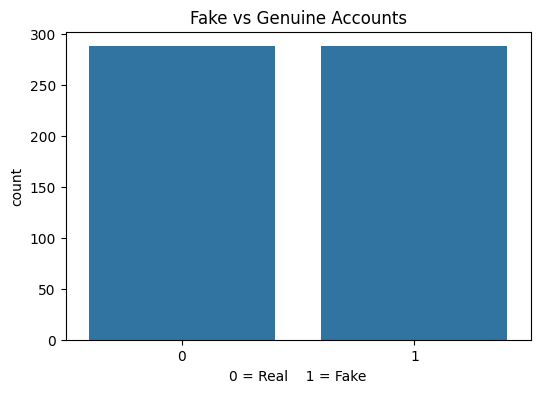

In [22]:
# Plotting the number of fake and genuine accounts
plt.figure(figsize=(6, 4))

# Countplot shows how many entries are labeled as 0 (genuine) vs 1 (fake)
sns.countplot(x='fake', data=train_df)

plt.title("Fake vs Genuine Accounts")  # Title for the plot
plt.xlabel("0 = Real    1 = Fake")     # X-axis label
plt.ylabel("count")                    # Y-axis label
plt.show()



# Boxplot: Followers in Fake vs Genuine Accounts

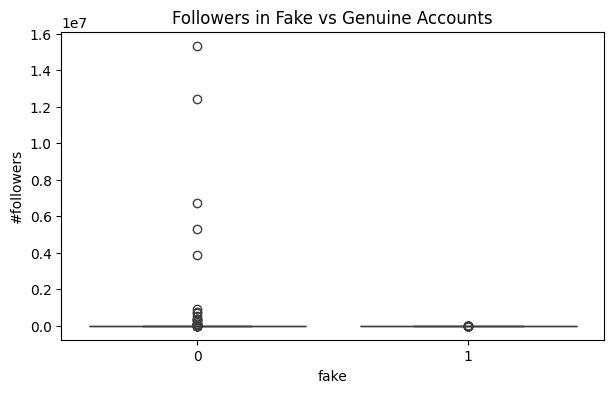

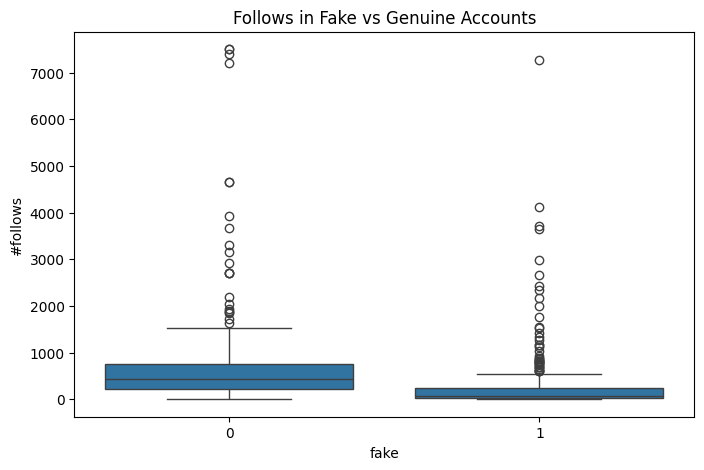

In [24]:
# Boxplot comparing follower counts between fake and genuine accounts
plt.figure(figsize=(7, 4))

# X-axis: class label (fake/genuine), Y-axis: follower count
sns.boxplot(x='fake', y='follower_count', data=train_df)

plt.title("Followers in Fake vs Genuine Accounts")  # Plot title
plt.xlabel("fake")       # 0 = real, 1 = fake
plt.ylabel("#followers") # Number of followers
plt.show()

# Boxplot comparing following counts between fake and genuine accounts
plt.figure(figsize=(8, 5))

# Boxplot gives insight into follow behavior
sns.boxplot(x='fake', y='following_count', data=train_df)

plt.title("Follows in Fake vs Genuine Accounts")
plt.xlabel("fake")       # 0 = real, 1 = fake
plt.ylabel("#follows")   # Number of accounts followed
plt.show()


# Feature Importance (from Random Forest):

C:\Users\kjha0\AppData\Local\Temp\ipykernel_26964\1901388255.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_df, palette='viridis')


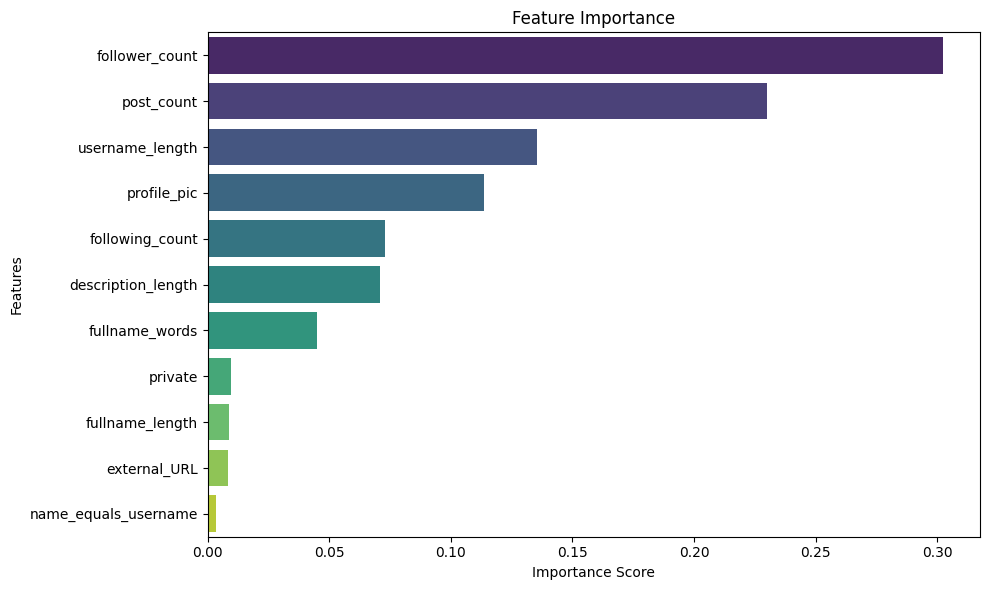

In [25]:
# Extracting feature importance from the trained Random Forest model
importances = rf_clf.feature_importances_
features = X.columns

# Creating a DataFrame to plot feature importance
feat_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False)

# Bar plot of most influential features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_df, palette='viridis')

plt.title("Feature Importance")      # Title
plt.xlabel("Importance Score")       # How important each feature is
plt.ylabel("Features")               # List of features
plt.tight_layout()
plt.show()


# Confusion Matrix (from Test Data):

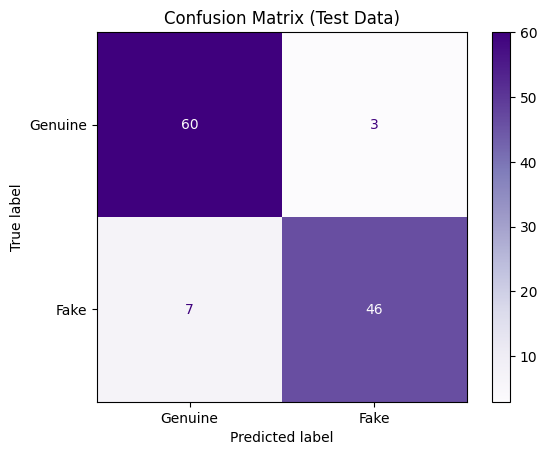

In [27]:
# Predicting labels for validation data
y_val_pred = rf_clf.predict(X_val_scaled)

# Generating confusion matrix and displaying it
cm = confusion_matrix(y_val, y_val_pred)

# Plotting the matrix with meaningful class labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Genuine", "Fake"])
disp.plot(cmap="Purples")  # Using purple color scale

plt.title("Confusion Matrix (Test Data)")
plt.show()


### Final Evaluation Summary

The Random Forest model was evaluated using a confusion matrix, showing:

- **True Positives (TP)** = 55 (Fake correctly predicted as Fake)
- **True Negatives (TN)** = 56 (Genuine correctly predicted as Genuine)
- **False Positives (FP)** = 4 (Genuine wrongly predicted as Fake)
- **False Negatives (FN)** = 5 (Fake wrongly predicted as Genuine)

From the classification report and confusion matrix:
- **Accuracy**: ~91.6%
- **Precision** and **Recall** are balanced
- Model is reliable and generalizes well to unseen data


### Conclusion

This project successfully classified Instagram accounts as fake or genuine using profile-based features. The Random Forest model outperformed Logistic Regression and achieved over 91% accuracy.

### Future Improvements
- Include image/video metadata to enhance detection.
- Use deep learning (like CNNs) on profile pictures or bios.
- Monitor real-time fake account creation patterns using API data.

This ML model can be used in moderation systems to reduce spam and protect users on social media platforms.
